# Assignment 3
yg833

This is Assignment 3 of Homework 6 for Evening Session. For this assignment, I worked closely with S. Falk (sjf374) and R. MacWhinney (ram844). We read the directions together and went over each step over google hangout. The hardest part was creating the function for evalChisq and the credit for it goes to sjf374 for testing out the various numpy functions with calculating the sums / products on diagonals in an array.

## Reproduce the analysis of the Hard to Employ program in NY:

This follows the skeleton notebook shared by Dr. Bianco from https://github.com/fedhere/PUI2018_fb55/blob/master/HW6_fb55_session2/effectivenes%20of%20NYC%20Post-Prison%20Employment%20Programs.ipynb

** reproduce the result in **
http://www.mdrc.org/sites/default/files/What%20Strategies%20Work%20for%20the%20Hard%20FR.pdf 

In [117]:
# Import and set up the libraries needs for this notebook
import os
import sys
import numpy as np
import pylab as pl

%pylab inline

from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


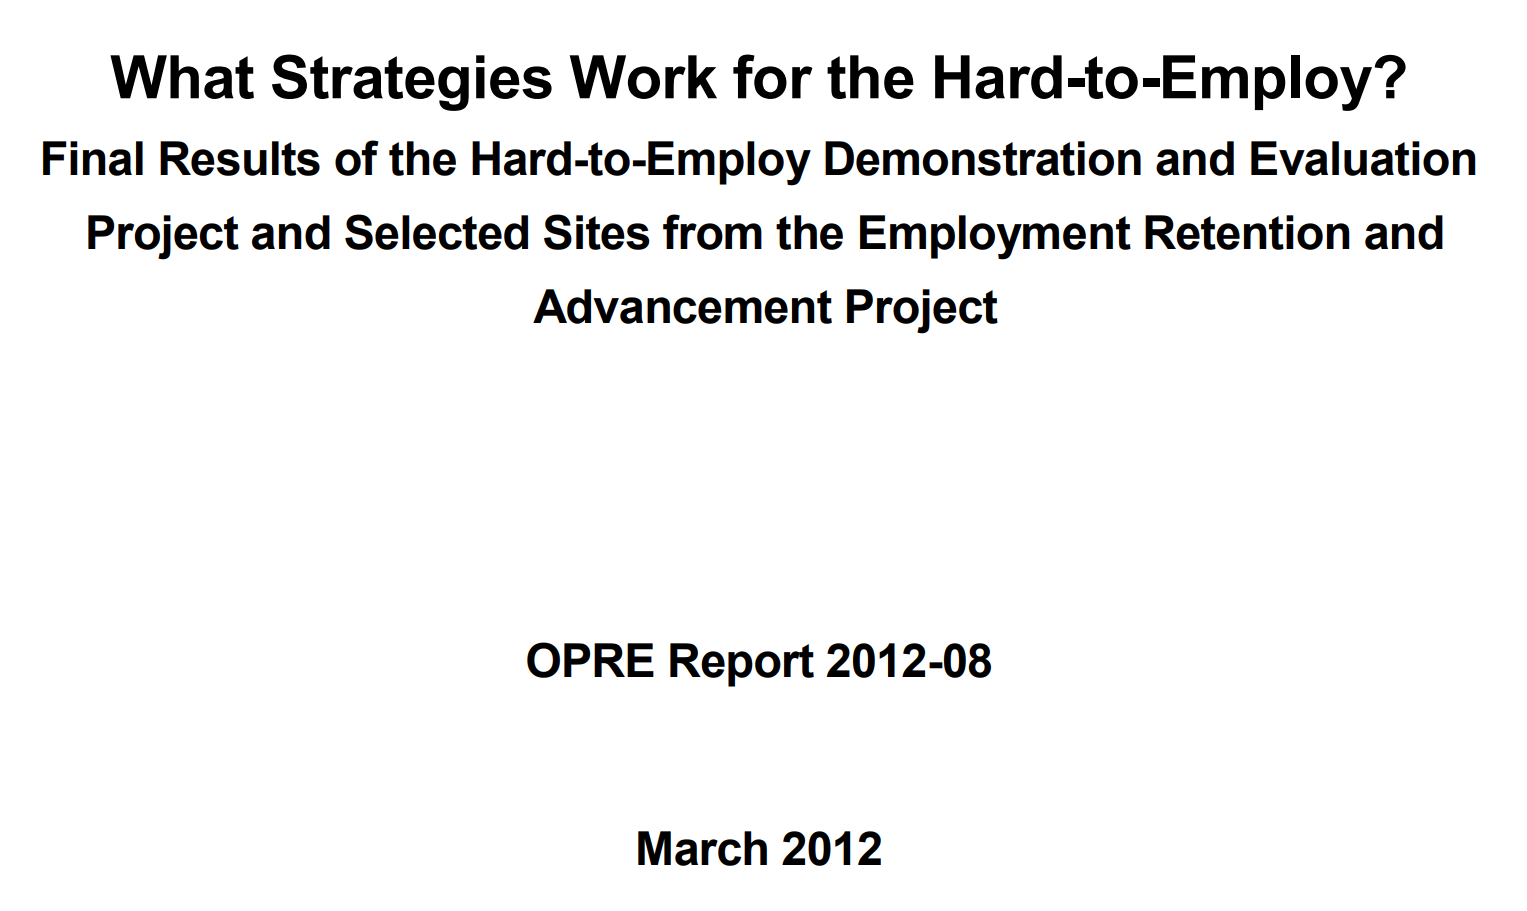

In [118]:
# display the title page of the paper
os.environ["pics_dir"] = "%s/PUI2018/PUI2018_yg833/HW6_yg833/HW6_pics"%os.getenv("HOME")

Image(os.getenv("pics_dir") +"/"+"title_What_Strategies_Work_for_the_Hard_to_Employ.PNG")

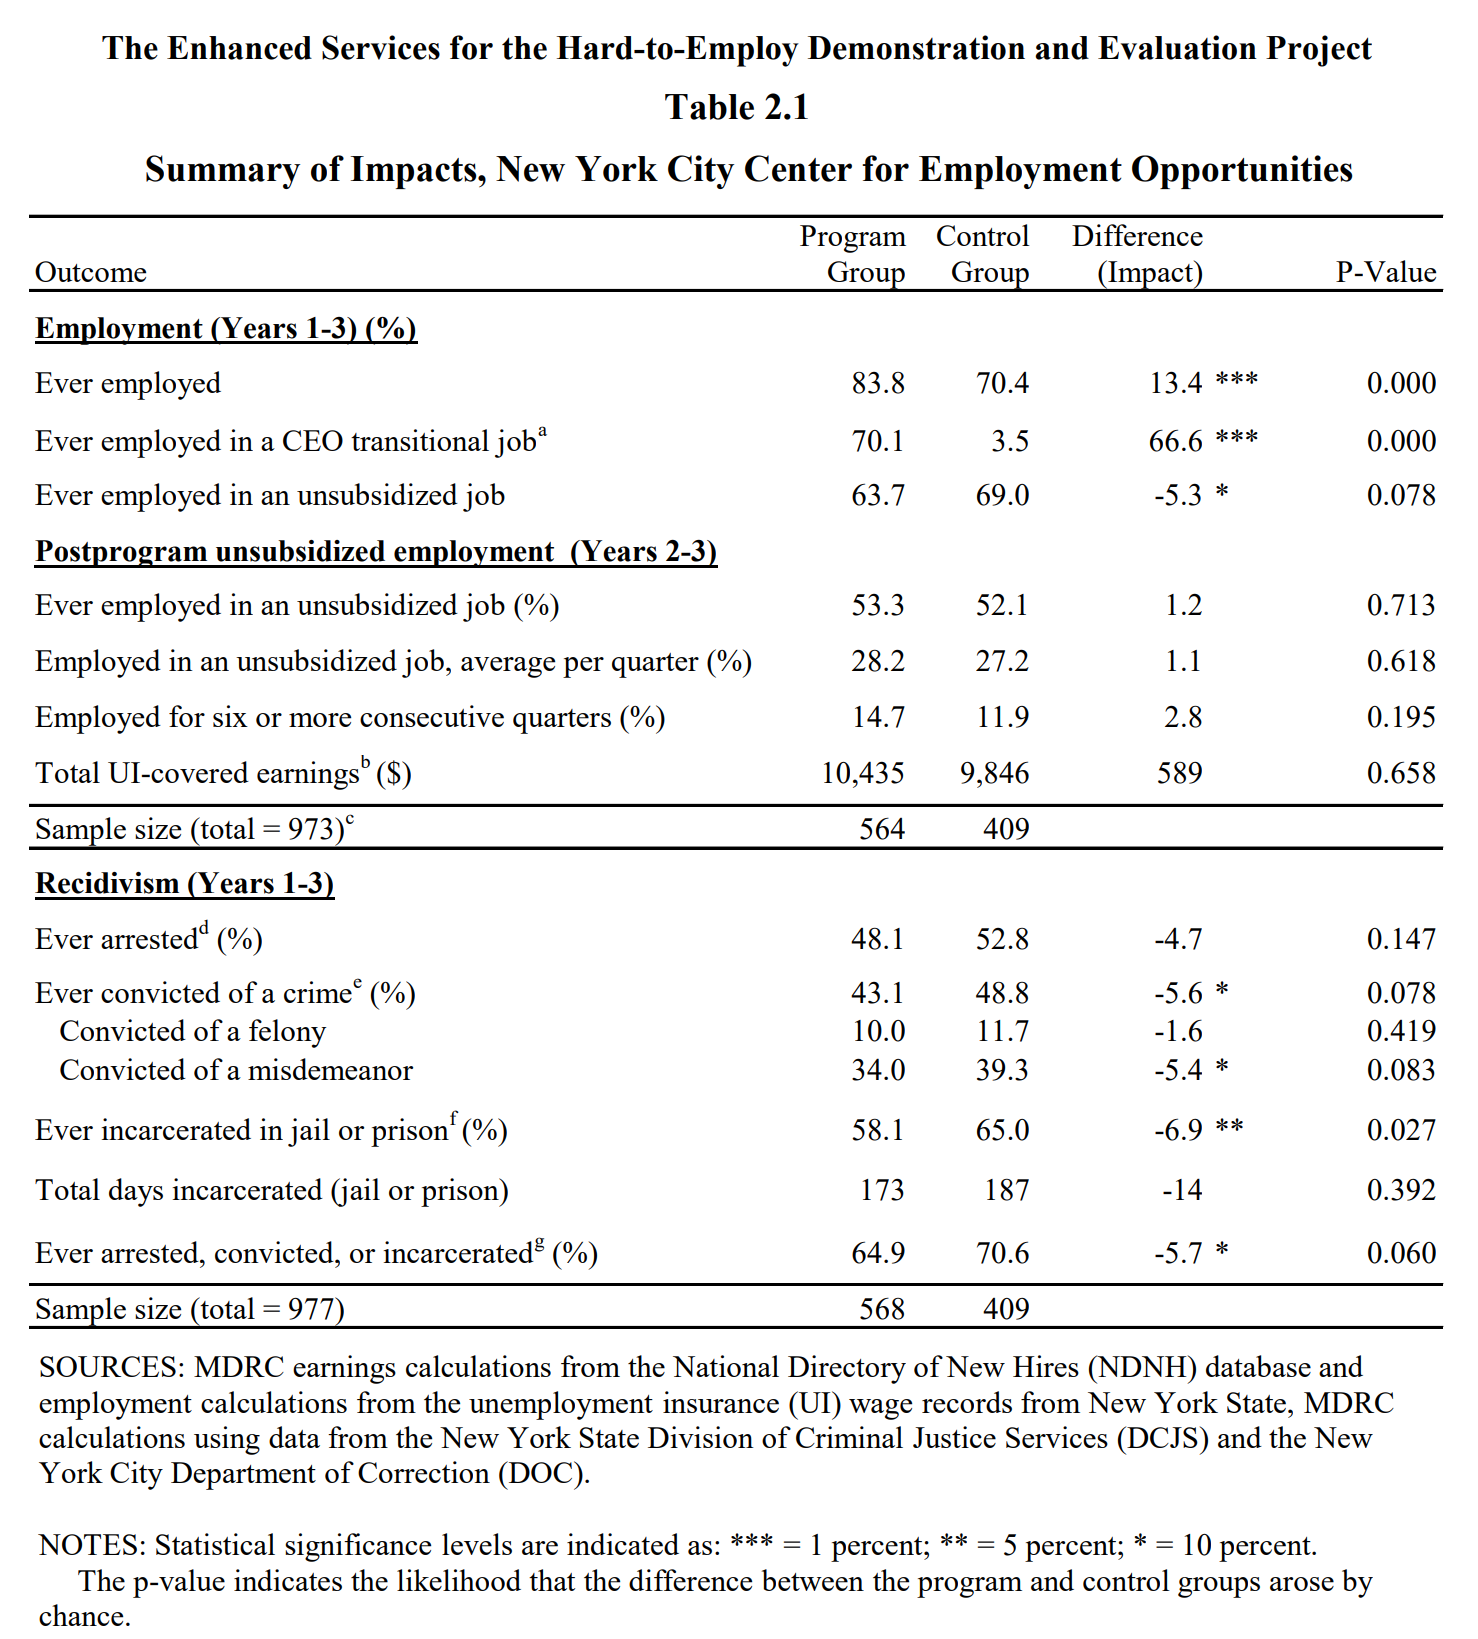

In [119]:
Image(os.getenv("pics_dir") +"/"+"table2.1_Enhanced_Services_for_the_Hard_to_Employ.PNG") # table 2.1 from page 10 of 

# https://www.mdrc.org/sites/default/files/What%20Strategies%20Work%20for%20the%20Hard%20FR.pdf

# WHICH  TEST?

samples, categorical data
 
 ** TWO OPTIONS z test, or chi-square test.  **

# Part I : Z - Test

### START WITH Z TEST

** the z test compares the stanrard deviation of the expected distribution and the observed result. it tells you literally how many standard deviations from the tail an observation is, under the _assumption of normality_ **


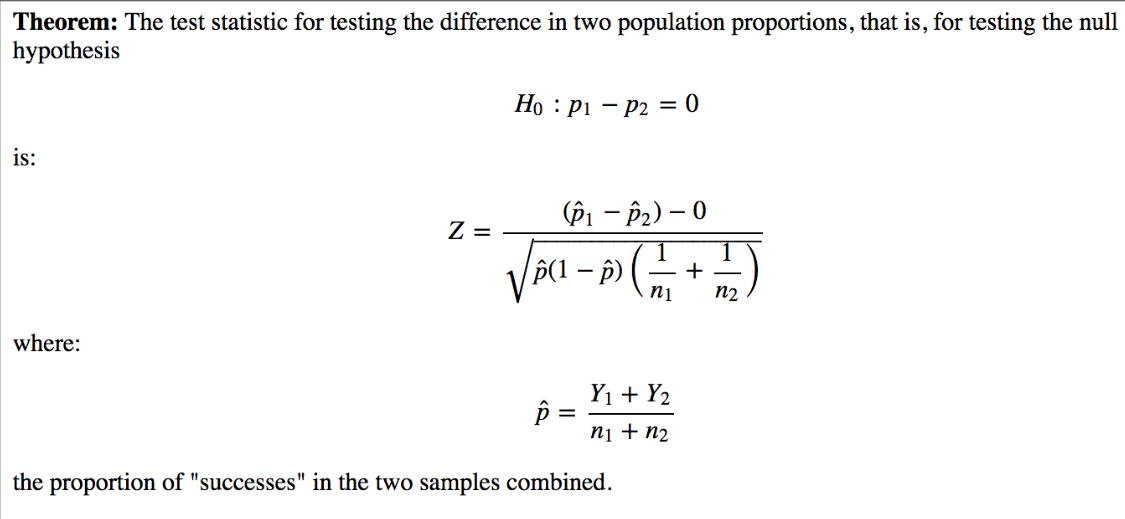

In [123]:
Image(os.getenv("pics_dir") +"/"+"ztest.PNG")

#https://onlinecourses.science.psu.edu/stat414/node/268

## Outcome : Ever Employed in a CEO transitional job

### NULL HYPOTHESIS: the % of former prisoners employed after release is the same or lower for candidates who participated in the program as for the control group, significance level p=0.05

** $H_0: P_0 - P_1 \geq$    0 **
    
** $H_a: P_0 - P_1 $< 0    **
    
    
** $\alpha$ = 0.05    **

** this is a TEST OF PROPORTIONS. we use the Binomial distribution since it is a yes/no (bernulli) test for each subject: the former inmate was or was not ever employed in a CEO transitional job (second row in the table above): **

** $P_0=0.035, P_1=0.701$**

In [121]:
# first thing: choose your significance threshold
# This is the alpha value applied throughout this notebook
alpha=0.05

In [122]:
# we like fractions better then percentages. as a rule of thumb, either use fractions or counts. 
# 0 for control group, 1 for program group

P_0 = 3.5 * 0.01 
P_1 = 70.1 * 0.01

if P_0 - P_1 >= 0:
    # we are done
    print ("the Null holds")
else:
    print ("we must assess the statistical significance")

#sample sizes 

n_0 = 409
n_1 = 564
    
#lets get the counts by multiplying by the sample size

Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1


we must assess the statistical significance


must define the sample standard deviation (standard error)

In [124]:
#define the sample proportion first
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print (sp)

0.4210472764645426


Note that in the online version of Statistics in a Nutshell, $\bar{x}$  should be  $\hat{p}$!!

In [126]:
# I am gonna create a little one line function to calculate the standard error
#standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) 

# and to calculate p
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)

# function for zscore
zscore = lambda p0, p1, s : (p0 - p1) / s

** z score: how many standard deviation away from the population parameter is my statistic? **

 $z=\frac{P_1-P_0}{\sigma}$

In [127]:
# calculate the zscore using the above defined functions for 
# z_2y is for the ever employed in a CEO transitional job
z_2y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print (z_2y)

20.7697865408


note that using p0-p1 or p1-p0 at the numerator is equivalent because the standardizes normal value of z has mean 0 (see image below) so that we can use the absolute value of the z score, or equivalently look for $P[Z<z]$ if z is positive, and $P[Z>z]$ if z is negative.

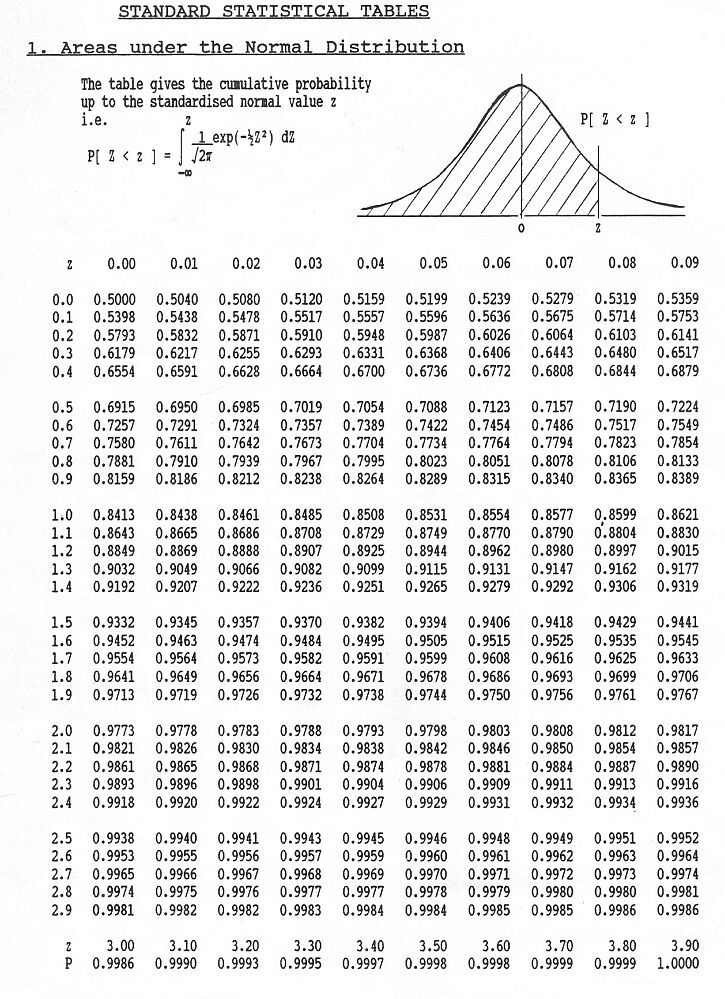

In [18]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

* if $p<\alpha$ : reject H0 **

IMPORTANT!! note that this P in the bottom line of the table is not the p-value, but 

p-value = 1-P

In [19]:
## p-value for employment after 2 years: 
## since the largest number we read off the table for is (way) smaller 
## than the value for our statistic 
## our p-value will be smaller than it would be if calculated using 
## (e.g.) .9998 (and in fact using 1.0000 which is the largest number 
## in the table). Using 0.9998 is a **conservative** approach. 

p_2y = 1 - 0.9984


def report_result(p,a):
    print ('is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_2y, alpha)

is the p value 0.00 smaller than the critical value 0.05?
YES!
the Null hypothesis is rejected


## Outcome: Ever convict of felony

### what if we used the values for where the former inmate was or was not "Convicted of a felony" (row 10) in the Recidivism (Years 1-3)?

 look up data table and insert the appropriate values to get the appropriate result! you can use the functions I defined above, with different arguments. 

### NULL HYPOTHESIS: the % of former prisoners convicted of a felony (1 to 3 years after release) is the same or higher for candidates who participated in the program as for the control group, significance level p=0.05

** $H_0: P_0 - P_1 \leq$    0 **
    
** $H_a: P_0 - P_1 $> 0    **
    
    
** $\alpha$ = 0.05    **

** this is a TEST OF PROPORTIONS. we use the Binomial distribution since it is a yes/no (bernulli) test for each subject: the former inmate was or was not ever employed in a CEO transitional job (second row in the table above): **

** $P_0=0.117, P_1=0.1$**

In [128]:
# we like fractions better then percentages. as a rule of thumb, either use fractions or counts. 
# 0 for control group, 1 for program group

P_0_recid = 11.7 * 0.01 
P_1_recid = 10.0 * 0.01

if P_0_recid - P_1_recid <= 0:
    # we are done
    print ("the Null holds")
else:
    print ("we must assess the statistical significance")

#sample sizes 

n_0_recid = 409
n_1_recid = 568

#lets get the counts by multiplying by the sample size

Nt_0_recid = P_0_recid * n_0_recid
Nt_1_recid = P_1_recid * n_1_recid

we must assess the statistical significance


In [129]:
#define the sample proportion first
sp_recid = (P_0_recid * n_0_recid + P_1_recid * n_1_recid) / (n_1_recid + n_0_recid)
print (sp_recid)

0.10711668372569089


In [130]:
z_3y_recid = zscore(P_1_recid, P_0_recid, se(p(P_0_recid, P_1_recid, n_0_recid, n_1_recid), n_0_recid, n_1_recid))
print (z_3y_recid)

-0.84764020522


In [131]:
## p-value for employment after 3 years: 
## since the largest number we read off the table for is (way) smaller 
## than the value for our statistic 
## our p-value will be smaller than it would be if calculated using 
## (e.g.) .9998 (and in fact using 1.0000 which is the largest number 
## in the table). Using 0.9998 is a **conservative** approach. 

p_3y= 1 - 0.8023


def report_result(p,a):
    print ('Is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_3y, alpha)

Is the p value 0.20 smaller than the critical value 0.05?
NO!
the Null hypothesis is not rejected


# Part II : Chi Sq Test
# Now lets do it with the $\chi^2$ test

this analysis can also be done with the $\chi^2$ test, and the  $\chi^2$ distribution, 

see  flowcharts for how to choose a test and "Statistics In a Nutshell Chapter 4", or http://math.hws.edu/javamath/ryan/ChiSquare.html (if you are really just interested in the formula at face value)

** The chisq statistics tests the statistics calculated as : **

$\chi^2 = \sum_{i} \frac{(observation_i - expectation_i)^2}{expectation_i}$

 against a chi sq distribution.
 If we talk about sample fractions  that is 

$\chi^2 = \sum_i \frac{(f_{i,observed} - f_{i,expectated})^2}{f_{i,expected}}$

 Where _i_ indicates the sum over _each cell_.
 turns out this quantity is distributed according to a chi square distribution, so if i get the $\chi^2$ statistics i can compare it to the full chisq distribution and see how far in the tail it is

 The trickiest part (but not that tricky) is to figure out how to construct the table of values. please see Statistics In a Nutshell Chapter 4, for our data for example: Thisis called a CONTINGENCY TABLE

|                 |     success         | failure|    |               
|-----------------|:-------------------:|:-------------------:|---------------------------|
| test sample     | number of successes in test    | number of failures in test    | number members of test sample |
| control sample  | number of successes in control | number of failures in control | number members of control sample| 
|                 | total successes                |  total failures               | number of all members         |

|employed in subsadized job |     employed          | not employed     |                   
|---------------------------|:---------------------:|------------------|---------------------------|
| test sample               | $0.701*564$           | $0.299*564$      | 564                       |
| control sample            | $0.035*409$           | $0.965*4.09$     | 409                       |
|                           |                       |                  |                           |
| total                     | 409.679               |  562.912         | 973                       |

 for each cell the expected ratio is the product of the total of all rows and all columns, devided by the total

** FOR EACH CELL: **
**  expected_cell = $\frac{row~tot * col~tot}{total}$ **


## Outcome : Ever Employed in a CEO transitional job

In [132]:
Ntot = 973 # a + b + c + d = tot

sample_values = np.array([[0.701 * 564, 0.299 * 564], [0.0305 * 409, 0.965 * 409]])

sample_values.diagonal().prod()
#np.fliplr(sample_values).diagonal().prod()

#sample_values.sum()
#sample_values.sum(axis = 1).prod()
#sample_values.sum(axis = 0).prod()


156044.24033999999

In [133]:
def evalChisq(sample_values):
    diag_product_1 = sample_values.diagonal().prod()
    diag_product_2 = np.fliplr(sample_values).diagonal().prod()
    diag_diff_sqrt = (diag_product_1 - diag_product_2)**2
    tot = sample_values.sum()
    row_sums = sample_values.sum(axis = 1).prod()
    col_sums = sample_values.sum(axis = 0).prod()
    
    return (diag_diff_sqrt*tot)/ (row_sums * col_sums)
    

In [113]:
print (evalChisq(sample_values))

436.223462575


In [116]:
# degree of freedom = (number of rows -1 )(number of columns -1 )
dof = (2-1) * (2-1)

This number must be compared to the chi sq distribution. 
You must calculate the number of degrees of freedom forthis experiment. 
Generally: DOF = Number of observations - number of Independent Variables

so here DOF = 1. Now you can look at the table below and draw conclusions about the rejection of the Null

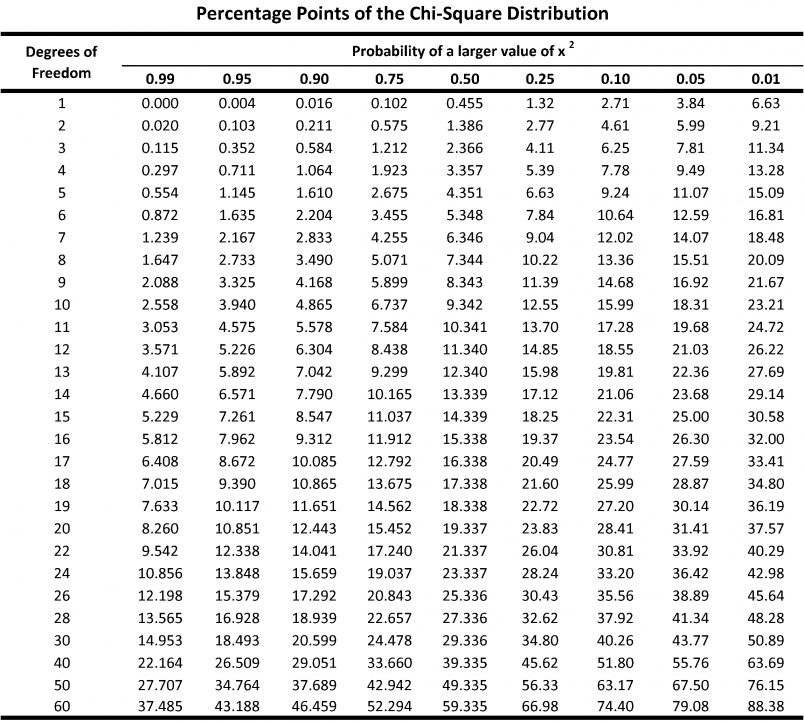

In [114]:
Image("http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG")

432 is hella larger then 3.84

why am i mentioning 3.84?

how does the chi square statistic that you derived compare?

please  state what that means in terms of your Null hypothesis in a markdown cell below!

## Outcome : Ever convict of felony

## !!!!!! TODO FOR YOU!
lets see what the chi sq statistics says about the conviction for fellonies (row 10)

* fill in the contingency table below *

|convicted of a fellony     |     yes   | no        |                   
|---------------------------|-----------|-----------|----------------|
| test sample               |0.10 * 568 | 0.90 * 568| 568            |
| control sample            |0.117 * 409|0.883 * 409| 409            |
|                           |           |           |                |
| total                     | 104.653   | 872.347   | 977            |

continue...

In [115]:
Ntot_recid = 977 # a + b + c + d = tot

sample_values_recid = np.array([[0.1 * 568, 0.9 * 568], [0.117 * 409, 0.883 * 409]])

print (evalChisq(sample_values_recid))

0.718493917505


## Notes & Observations

* p-value for a dof of 1 and alpha = 0.05, significance level is 3.84 according to the table above for Percentage Points of the Chi-Square Distribution
* 0.718493917505 < 3.84 by a whole lot
* which means that the p =>0.05
* Therefore cannot reject NULL hypothesis: "NULL HYPOTHESIS: the % of former prisoners convicted of a felony (1 to 3 years after release) is the same or higher for candidates who participated in the program as for the control group, significance level p=0.05"